In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
MARIO_SACUDO_RGB = np.array(Image.open("mario_sacudo.png"))[:, :, :3]

In [4]:
def convert_to_grayscale(rgb_image: np.ndarray) -> np.ndarray:
    # Carregar a imagem
    l, c, _ = rgb_image.shape
    
    # Criar matriz para armazenar a versão em cinza
    grayscale_image = np.zeros((l, c), dtype=np.uint8)
    
    # Converter para escala de cinza
    for i in range(l):
        for j in range(c):
            r, g, b = map(float, rgb_image[i, j])
            grayscale_image[i, j] = int((r + g + b) / 3)
    
    return grayscale_image

In [5]:
def conv(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Aplica um filtro de convolução em uma imagem em escala de cinza.
    
    :param image: Matriz NumPy representando a imagem de entrada.
    :param kernel: Matriz NumPy representando o filtro de convolução.
    :return: Matriz NumPy representando a imagem filtrada.
    """

    m, n = kernel.shape
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    # Novas dimensões da imagem (imagem menos o tamanho do filtro):
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))

    for i in range(new_l):
        for j in range(new_c):
            # Soma da multiplicação ponto-a-ponto entre o kernel e a
            # Imagem (recorte do trecho da imagem do mesmo tamanho do kernel):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

In [6]:
def sobel_filter(image: np.ndarray) -> tuple:
    """
    Aplica o operador de Sobel para detecção de bordas.
    
    :param image: Matriz NumPy representando a imagem em escala de cinza.
    :return: Tupla contendo (gradiente X, gradiente Y, magnitude do gradiente).
    """
    
    # Definir os kernels de Sobel para direções X e Y
    kernel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float64)
    
    kernel_y = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ], dtype=np.float64)
    
    # Aplicar convolução com os kernels
    conv_x = conv(image, kernel_x)
    conv_y = conv(image, kernel_y)
    
    # Calcular a magnitude do gradiente (mesmo que np.sqrt(conv_x**2 + conv_y**2))
    gradient = np.hypot(conv_x, conv_y)
    
    return conv_x, conv_y, gradient

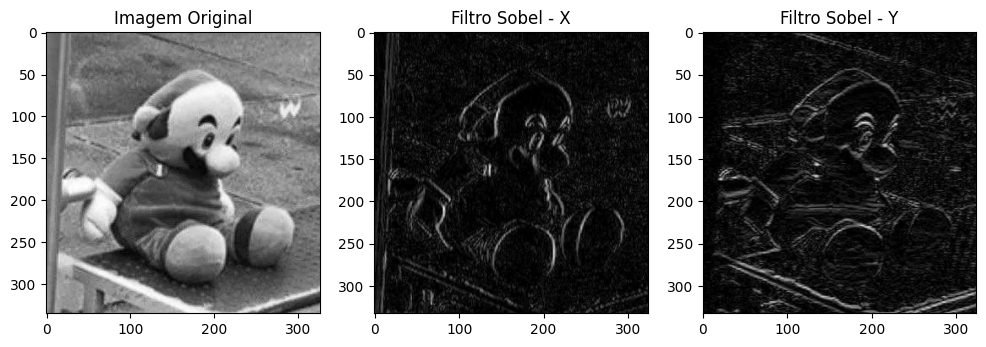

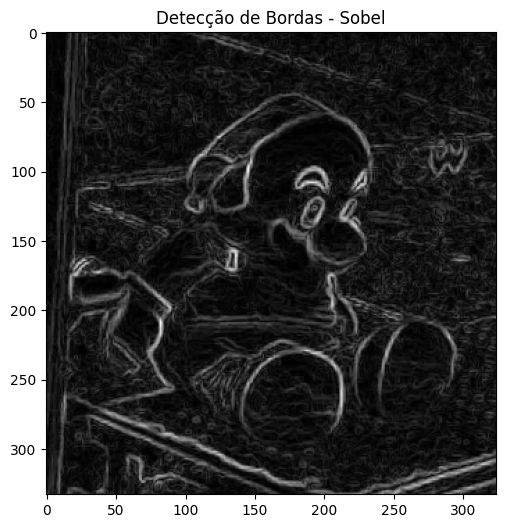

In [ ]:
if __name__ == "__main__":
    mario_grayscale = convert_to_grayscale(MARIO_SACUDO_RGB)
    
    # Normalizando para 0-1 antes da convolução braba
    mario_normalized = mario_grayscale / 255.0
    
    # Aplicar o filtro Sobel
    sobel_x, sobel_y, sobel_combined = sobel_filter(mario_normalized)
    
    # Normalizando resultados
    sobel_x_abs = np.abs(sobel_x)
    sobel_y_abs = np.abs(sobel_y)
    
    # Normalizando o gradiente para 0-1
    sobel_combined_normalized = sobel_combined / sobel_combined.max()
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Imagem Original")
    plt.imshow(mario_grayscale, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title("Sobel - X")
    plt.imshow(sobel_x_abs, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title("Sobel - Y")
    plt.imshow(sobel_y_abs, cmap='gray')
    
    plt.figure(figsize=(6, 6))
    plt.title("Sobel final")
    plt.imshow(sobel_combined_normalized, cmap='gray')
    
    # plt.show()